In [1]:
import os

In [2]:
classes = ["real", "deepfake"]

In [3]:
sets = ["train", "validation"]

In [4]:
os.listdir("./AUGMENTED/train_frames_augmented/real")

['blyoxkhsdl',
 'kpfiadskoi',
 'zbhlvhjjgt',
 'eaigdemyfo',
 'tbuuuamwak',
 'sggoinedya',
 'wfecziomie',
 'wclvkepakb',
 'thlsdnvgqd',
 'stprvhmezo',
 'drxkxlcmto',
 'evtxiaxexc',
 'ddssybhovi',
 'ztyuiqrhdk',
 'ejuxvtyizf',
 'gqauayeamb',
 'fewczsiiye',
 'azphckonyb',
 'zvtqhjmvqd',
 'fmabtnteqd',
 'xhsramepav',
 'mwxecbuidu',
 'uyndmiqdei',
 'nanyjxjvlq',
 'fnkdkfajak',
 'zmxeiipnqb',
 'zgwrggyysr',
 'eipwxqahgp',
 'kkhtabarcx',
 'lvecnxplwi',
 'qetboljnzl',
 'yxvmusxvcz',
 'nzycclllqm',
 'dateawnngx',
 'qabreprhxg',
 'zkadsbaxmz',
 'izwollgcyv',
 'wjxmmjmchv',
 'htrkeemhkr',
 'defvdrrahn',
 'ljtkjhntue',
 'txhmrahjzu',
 'crgcrqxqjw',
 'ntyxnzblsp',
 'blvuhoedza',
 'ojmwqqxjzk',
 'ksfzdewnkx',
 'ctbonxvats',
 'vvjfajsxig',
 'ixwjksvtxv',
 'dqavjmidxr',
 'gakrxuhtfw',
 'ryhglxejac',
 'yyyqdyejwn',
 'fsdonarqki',
 'adohdulfwb',
 'xqpuslrtuu',
 'lnjkpdviqb',
 'paikwrklxc',
 'blnmxntbey',
 'aftqqmiysd',
 'tupariqkuw',
 'dxfdovivlw',
 'ovxqacozqb',
 'zqwyggtgfc',
 'iskadyoizu',
 'kqpyjqbm

In [5]:
from utils.dataset import VideoDataset
from torchvision.transforms import v2
import matplotlib.pyplot as plt

In [6]:
transforms = v2.Compose([
    v2.RandomHorizontalFlip(p=0.5),
    v2.ColorJitter(),
    v2.GaussianBlur(kernel_size=3),
    v2.RandomAdjustSharpness(1.5)
])

In [7]:
train_ds = VideoDataset("data/train", None, 40, False, random_transforms=transforms)

In [16]:
for stuff in train_ds:
    print(os.path.basename(stuff["path"]))

aabkwhhgwv.mp4
abddemeing.mp4
adgbonsihj.mp4
adilspamjj.mp4
adnnnmoqek.mp4
aevavjcuqq.mp4
aeyprmocjo.mp4
afouwfpdkd.mp4
afsrjsoyyn.mp4
afwzbrfqbs.mp4
agmsqaprtg.mp4
agofgfcuuv.mp4
ahcuvkqvsh.mp4
ahjnxtiamx.mp4
ahnohhcpqg.mp4
ahptnosmvj.mp4
ahsnuvkzcp.mp4
ahtoprtppg.mp4
ahxnjolsip.mp4
aisdsiyxvh.mp4
ajbfgffvfe.mp4
ajxpaiqcee.mp4
akomkhnosr.mp4
akqynhsfkg.mp4
alhqvmlmfm.mp4
ambabjrwbt.mp4
angerpqrqg.mp4


KeyboardInterrupt: 

In [8]:
import torch

In [9]:
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=2)

tensor([[[ 78.,  78.,  78.,  ...,  97., 104., 107.],
         [ 78.,  78.,  78.,  ...,  97., 104., 107.],
         [ 78.,  78.,  78.,  ...,  97., 104., 107.],
         ...,
         [ 27.,  27.,  27.,  ...,  41.,  43.,  43.],
         [ 28.,  28.,  27.,  ...,  27.,  31.,  33.],
         [ 29.,  29.,  28.,  ...,  22.,  28.,  30.]],

        [[ 98.,  98.,  98.,  ...,  97., 104., 107.],
         [ 98.,  98.,  98.,  ...,  97., 104., 107.],
         [ 98.,  98.,  98.,  ...,  97., 104., 107.],
         ...,
         [ 21.,  21.,  21.,  ...,  42.,  44.,  44.],
         [ 23.,  23.,  23.,  ...,  28.,  32.,  34.],
         [ 24.,  24.,  24.,  ...,  23.,  29.,  32.]],

        [[149., 150., 152.,  ..., 112., 119., 122.],
         [149., 150., 152.,  ..., 112., 119., 122.],
         [149., 150., 152.,  ..., 112., 119., 122.],
         ...,
         [ 29.,  29.,  29.,  ...,  53.,  53.,  54.],
         [ 29.,  29.,  29.,  ...,  38.,  42.,  44.],
         [ 30.,  30.,  29.,  ...,  33.,  39.,  42.]]]

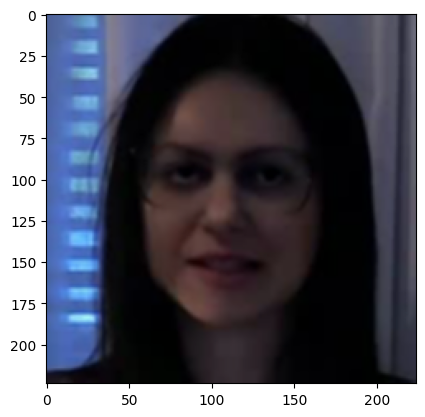

In [14]:
for idx, vid in enumerate(train_dl):
    if idx == 2:
        cur = vid["video"][0,0,...]
        plt.imshow(cur.permute(1, 2, 0).type(torch.uint8))

        print(cur)
        break
    


In [1]:
from utils.utils import compute_linear_size_n

In [60]:
block = lambda x: compute_linear_size_n(x, 4, 1, 4, 2)
pooling = lambda x: compute_linear_size_n(x, 4, 2, 0, 1)
layer = lambda x: pooling(block(x))

In [62]:
cur = 224
for i in range(3):
    cur = layer(cur)
print(cur)
print(cur * cur * 32 * 2 ** 5)
print(cur * cur)

35
1254400
1225
